# analyse occurrences of out-of-vocabulary

In [1]:
import spacy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nlp = spacy.load("../veld_data_6_apis_ner_models/models/m2/model/model-best/")

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open("../veld_data_5_apis_oebl__ner_gold/data/apis_oebl__ner__3_cleaned_simplified.json", "r") as f:
    data = json.load(f)

## iterate over all tokens of all texts, check if it's out of vocabulary and count its occurence

In [4]:
ent_oov_dict = {}
ent_not_oov_dict = {}
not_ent_oov_dict = {}
not_ent_not_oov_dict = {}

def inc_count_dict(d, text):
    c = d.get(text, 0)
    d[text] = c + 1
    return d

for data_row in data:
    doc = nlp(data_row["text_raw"])
    for t in doc:
        is_in_entity = False
        for e in data_row["entities"]:
            if t.idx >= e[0] and t.idx < e[1]:
                is_in_entity = True
                break
        if is_in_entity:        
            if t.is_oov:
                ent_oov_dict = inc_count_dict(ent_oov_dict, t.text)
            else:
                ent_not_oov_dict = inc_count_dict(ent_not_oov_dict, t.text)
        else:
            if t.is_oov:
                not_ent_oov_dict = inc_count_dict(not_ent_oov_dict, t.text)
            else:
                not_ent_not_oov_dict = inc_count_dict(not_ent_not_oov_dict, t.text)

## print counts of unique and total occurrences of each permutation

In [5]:
# count of unique entity-tokens that are out of vocabulary
count_unique_ent_oov = len(ent_oov_dict)

# count of sum of entity-tokens that are out of vocabulary
count_total_ent_oov = sum(list(ent_oov_dict.values()))

# count of unique entity-tokens that are within vocabulary
count_unique_ent_not_oov = len(ent_not_oov_dict)

# count of sum of entity-tokens that are within vocabulary
count_total_ent_not_oov = sum(list(ent_not_oov_dict.values()))

# count of unique not-entity-tokens that are out of vocabulary
count_unique_not_ent_oov = len(not_ent_oov_dict)

# count of sum of not-entity-tokens that are out of vocabulary
count_total_not_ent_oov = sum(list(not_ent_oov_dict.values()))

# count of unique not-entity-tokens that are within vocabulary
count_unique_not_ent_not_oov = len(not_ent_not_oov_dict)

# count of sum of not-entity-tokens that are within vocabulary
count_total_not_ent_not_oov = sum(list(not_ent_not_oov_dict.values()))

In [6]:
def print_bar_chart(plt_data, plt_labels):
    plt_data = plt_data[::-1]
    plt_labels = plt_labels[::-1]
    plt_indices = [i + 1 for i in range(len(plt_data))]
    plt.barh(plt_indices, plt_data)
    for y, x in zip(plt_indices, plt_data):
        plt.text(x, y, str(x), ha='left', va='center', fontsize=10)
    plt.xticks([])
    plt.yticks(plt_indices, plt_labels, fontsize=10)
    plt.show()

In [7]:
def calc_percentage(value_this, value_other):
    return round(100 / (value_this + value_other) * value_this, 2)

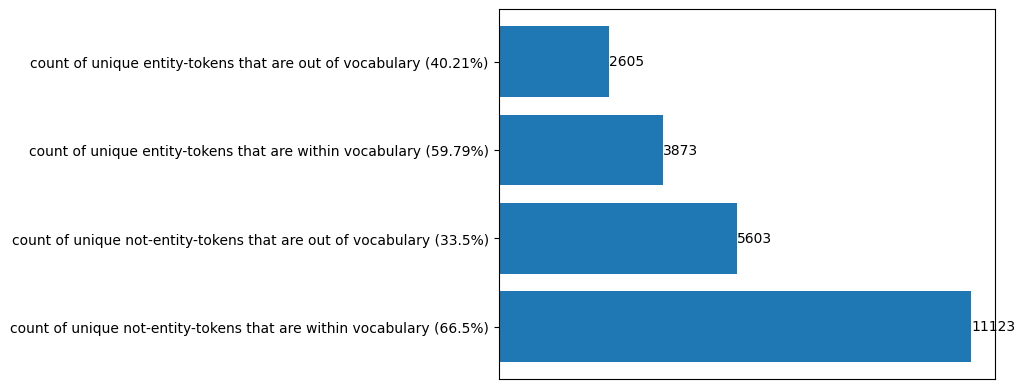

In [8]:
perc_unique_ent_oov = calc_percentage(count_unique_ent_oov, count_unique_ent_not_oov)
perc_unique_ent_not_oov = calc_percentage(count_unique_ent_not_oov, count_unique_ent_oov)
perc_unique_not_ent_oov = calc_percentage(count_unique_not_ent_oov, count_unique_not_ent_not_oov)
perc_unique_not_ent_not_oov = calc_percentage(count_unique_not_ent_not_oov, count_unique_not_ent_oov)

print_bar_chart(
    [
        count_unique_ent_oov, 
        count_unique_ent_not_oov,
        count_unique_not_ent_oov,
        count_unique_not_ent_not_oov,
    ],
    [
        f"count of unique entity-tokens that are out of vocabulary ({perc_unique_ent_oov}%)", 
        f"count of unique entity-tokens that are within vocabulary ({perc_unique_ent_not_oov}%)", 
        f"count of unique not-entity-tokens that are out of vocabulary ({perc_unique_not_ent_oov}%)", 
        f"count of unique not-entity-tokens that are within vocabulary ({perc_unique_not_ent_not_oov}%)", 
    ], 
)

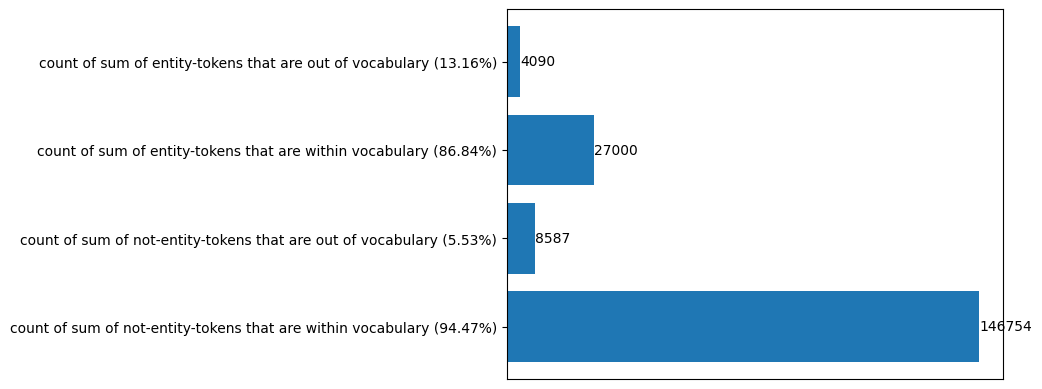

In [9]:
perc_total_ent_oov = calc_percentage(count_total_ent_oov, count_total_ent_not_oov)
perc_total_ent_not_oov = calc_percentage(count_total_ent_not_oov, count_total_ent_oov)
perc_total_not_ent_oov = calc_percentage(count_total_not_ent_oov, count_total_not_ent_not_oov)
perc_total_not_ent_not_oov = calc_percentage(count_total_not_ent_not_oov, count_total_not_ent_oov)

print_bar_chart(
    [
        count_total_ent_oov, 
        count_total_ent_not_oov,
        count_total_not_ent_oov,
        count_total_not_ent_not_oov,
    ],
    [
        f"count of sum of entity-tokens that are out of vocabulary ({perc_total_ent_oov}%)", 
        f"count of sum of entity-tokens that are within vocabulary ({perc_total_ent_not_oov}%)", 
        f"count of sum of not-entity-tokens that are out of vocabulary ({perc_total_not_ent_oov}%)", 
        f"count of sum of not-entity-tokens that are within vocabulary ({perc_total_not_ent_not_oov}%)", 
    ], 
)

## print example tokens that occur the most often

In [10]:
def print_most_occurring(d, n):
    l = []
    for k,v in d.items():
        l.append((k, v))
    l.sort(key=lambda x: -x[1])
    for t in l[:n]:
        print(t)

In [11]:
# print most occurring entity tokens that are outside of vocabulary
print_most_occurring(ent_oov_dict, 20)

('Joseph-Ordens', 52)
('Griepenkerl', 42)
('Staatsgewerbeschule', 31)
('Nüll', 27)
('Kundmann', 26)
('Erzh', 24)
('Kupelwieser', 24)
('Engerth', 19)
('Kunstakad', 18)
('Zumbusch', 18)
('L’', 17)
('Trenkwald', 16)
('Laufberger', 15)
('Napló', 15)
('Pesti', 15)
('Künstlergenossenschaft', 15)
('Schottengymn', 14)
('Sicardsburg', 14)
('Lászlófalva', 13)
('Mikeföld', 13)


In [12]:
# print most occurring non-entity tokens that are outside of vocabulary
print_most_occurring(not_ent_oov_dict, 20)

('\n', 183)
('Ehrenmitgl', 69)
('Absolv', 67)
('Weltausst', 66)
('absolv', 46)
('Vizepräs', 46)
('ausgez', 40)
('Kunstver', 28)
('literar', 26)
('Smlg', 22)
('\n\n', 21)
('Gründungsmitgl', 21)
('verehel', 20)
('Beitrr', 19)
('Dr.jur', 18)
('Kunstausst', 17)
('Stud.reisen', 17)
('schließl', 16)
('Kmdt', 16)
('Tagesztg', 16)


In [13]:
# print most occurring entity tokens that are within vocabulary
print_most_occurring(ent_not_oov_dict, 20)

('.', 2826)
('Wien', 1017)
('der', 746)
('in', 562)
('Wr', 551)
('Akad', 492)
('bildenden', 455)
('Künste', 421)
('v.', 332)
('München', 287)
('(', 264)
(')', 261)
('Univ.', 260)
('und', 248)
('Paris', 229)
('Prag', 220)
('Künstler', 211)
('Franz', 198)
('Italien', 191)
('Wiens', 186)


In [14]:
# print most occurring non-entity tokens that are within vocabulary
print_most_occurring(not_ent_not_oov_dict, 20)

('.', 12051)
(',', 10601)
('der', 6008)
('und', 5723)
('in', 4528)
('(', 3324)
('er', 3276)
(')', 3268)
('die', 2251)
('des', 2185)
('an', 1878)
('„', 1593)
('“', 1590)
('als', 1428)
('von', 1244)
('nach', 1222)
('mit', 1192)
('war', 1153)
('den', 1143)
('für', 1084)
